# Mathematical formulation of the Softmax Regression model:

## Model hypothesis:

+ Input (ảnh) được chuyển thành các vector đặc trưng: x $\in$ $R^{d}$
+ Số lớp: K
+ Tham số của mô hình: W $\in R^ {K*d}$ (trọng số), và b $\in R^{K}$
+ Logits: z = W*x + b
+ Xác xuất các nhãn dự đoán: 

$\hat{y}$ = softmax(Wx + b), với $\hat{y} \in R^{K}$ , $\hat{y}$ $\in$ $[0,1]$

## Softmax function:

+ Hàm softmax cho lớp k được định nghĩa như sau: 
$\hat{y}_k = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$

+ Trong đó: z = W*x + b


## Cross-entropy loss function:

+ Quá trình mô hình học dựa trên hàm loss cross-entropy
+ Cross-entropy được định nghĩa như sau:
+ Với: x: input, y là nhãn thật (dạng one-hot), y_k: giá trị tại k trong y.

$\mathcal{L}(x, y) = -\sum_{k=1}^{K} y_k \log(\hat{y}_k)$


+ Với tập huấn luyện N mẫu:

$\mathcal{J}(W, b) = \frac{1}{N}\sum_{i=1}^{N} \mathcal{L}(x^{(i)}, y^{(i)})$


## Gradient descent update rules:

+ Với 1 sample:\
$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial W} &= (\hat{y} - y)x^{T} \\
\frac{\partial \mathcal{L}}{\partial b} &= (\hat{y} - y)
\end{aligned}
$
+ Với mini-batch/toàn bộ dữ liệu:
\
$
\begin{aligned}
\frac{\partial \mathcal{J}}{\partial W} &= \frac{1}{N}\sum_{i=1}^{N} \frac{\mathcal{\partial L_i}}{\partial W} \\
\frac{\partial \mathcal{J}}{\partial b} &= \frac{1}{N}\sum_{i=1}^{N} \frac{\mathcal{\partial L_i}}{\partial b}
\end{aligned}
$

+ Update:
    + Với 1 mẫu:\
$W \leftarrow W - \alpha \frac{\partial L}{\partial W}
\\
b \leftarrow b - \alpha \frac{\partial L}{\partial b}
$
    + Với N mẫu:\
$W \leftarrow W - \alpha \frac{\partial J}{\partial W}
\\
b \leftarrow b - \alpha \frac{\partial J}{\partial b}
$

+ Với $\alpha$: là learning rate

# Toàn bộ pipeline cho bài toán Softmax Regression:


+ Với 1 mẫu $(x, y)$ từ training

+ Tính output $\hat{y}$

    $z = Wx + b$


    $\hat{y} = softmax(z)$

    Tức: $\hat{y}_k = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$

+ Tính loss:

    $L(\theta) = -\Big( y^{T}\log(\hat{y})\Big)$


+ Tính đạo hàm:

    $\nabla_{\theta} L = x(\hat{y} - y)^{T}$
+ Update parameters:

    $\theta \leftarrow \theta - \eta \nabla_{\theta} L$

    $\eta \text{ is learning rate}$


# Data EDA:

### Read data

In [1]:
import struct
import numpy as np

def read_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        images = data.reshape(num, rows, cols)
        return images.astype(np.float32)

def read_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data


In [2]:
train_images = read_images("../data/train-images.idx3-ubyte")
train_labels = read_labels("../data/train-labels.idx1-ubyte")
test_images  = read_images("../data/t10k-images.idx3-ubyte")
test_labels  = read_labels("../data/t10k-labels.idx1-ubyte")

In [3]:
import os
import numpy as np
from PIL import Image

os.makedirs("./image", exist_ok=True)

img = train_images[1]

# nếu đang flatten thì reshape
if img.ndim == 1:
    img = img.reshape(28, 28)

img = img.astype(np.float32)

# Nếu ảnh đang ở [0,1] thì scale lên
if img.max() <= 1.0:
    img = img * 255.0

img_uint8 = np.clip(img, 0, 255).astype(np.uint8)

Image.fromarray(img_uint8).save("./image/debug_img.png")


### Visualize data:

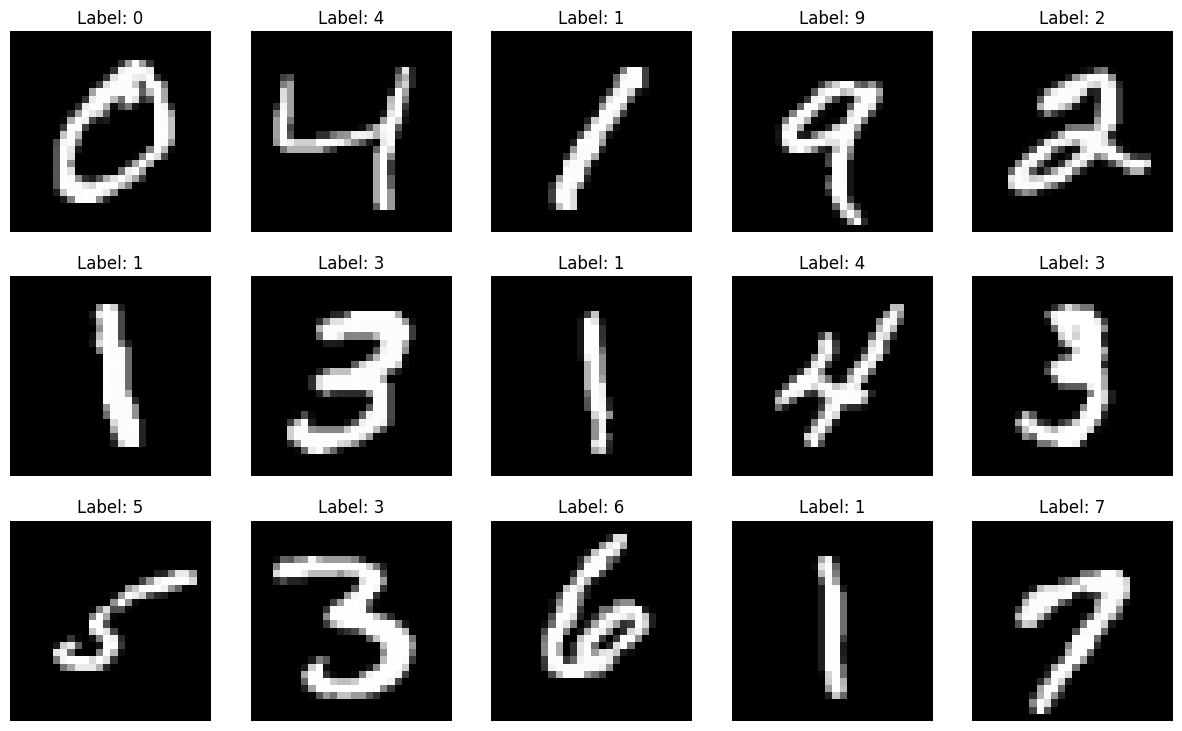

In [4]:
# Hiển thị ảnh
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i+1], cmap='gray')
    ax.set_title(f"Label: {train_labels[i+1]}")
    ax.axis('off')
plt.show()



### Thống kê cơ bản về data

#### Số lượng dữ liệu

In [5]:
print(f"Số lượng ảnh và kích thước ảnh train {train_images.shape}")  # (60000, 28, 28)
print(f"Số lượng nhãn train {train_labels.shape}")  # (60000,)
print(f"Số lượng ảnh và kích thước ảnh test {test_images.shape}")    # (10000, 28, 28)
print(f"Số lượng nhãn test {test_labels.shape}")    # (10000,)

Số lượng ảnh và kích thước ảnh train (60000, 28, 28)
Số lượng nhãn train (60000,)
Số lượng ảnh và kích thước ảnh test (10000, 28, 28)
Số lượng nhãn test (10000,)


In [6]:
print(f"Kiểu dữ liệu train {type(train_images)}")
print(f"Kiểu dữ liệu của phần tử ảnh tập train {type(train_images[0][0][0])}")
print(f"Kiểu dữ liêu train labels {type(train_labels)}")
print(f"Kiểu dữ liệu test {type(test_images)}")
print(f"Kiểu dữ liệu của phần tử ảnh tập test {type(test_images[0][0][0])}")
print(f"Kiểu dữ liệu test labels {type(test_labels)}")

Kiểu dữ liệu train <class 'numpy.ndarray'>
Kiểu dữ liệu của phần tử ảnh tập train <class 'numpy.float32'>
Kiểu dữ liêu train labels <class 'numpy.ndarray'>
Kiểu dữ liệu test <class 'numpy.ndarray'>
Kiểu dữ liệu của phần tử ảnh tập test <class 'numpy.float32'>
Kiểu dữ liệu test labels <class 'numpy.ndarray'>


In [7]:
# Khoảng giá trị pixel
print(f"Giá trị pixel nhỏ nhất trong tập train: {np.min(train_images)}")
print(f"Giá trị pixel lớn nhất trong tập train: {np.max(train_images)}")
print(f"Gái trị pixel trung bình trong tập train: {np.mean(train_images)}")

print(f"Giá trị pixel nhỏ nhất trong tập test: {np.min(test_images)}")
print(f"Giá trị pixel lớn nhất trong tập test: {np.max(test_images)}")
print(f"Gái trị pixel trung bình trong tập test: {np.mean(test_images)}")


Giá trị pixel nhỏ nhất trong tập train: 0.0
Giá trị pixel lớn nhất trong tập train: 255.0
Gái trị pixel trung bình trong tập train: 33.31844711303711
Giá trị pixel nhỏ nhất trong tập test: 0.0
Giá trị pixel lớn nhất trong tập test: 255.0
Gái trị pixel trung bình trong tập test: 33.79124069213867


#### Phân bố nhãn:

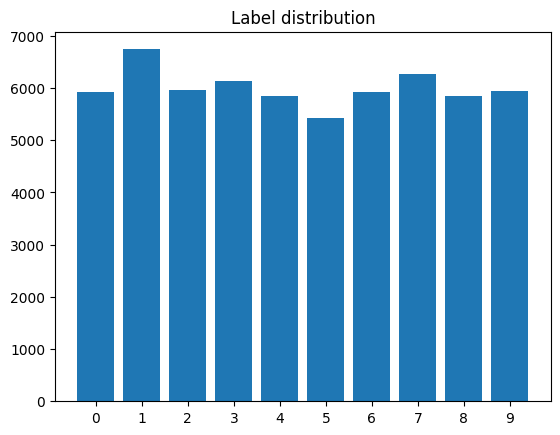

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# 1) Label distribution
counts = np.bincount(train_labels, minlength=10)
plt.bar(range(0,10,1), counts); 
plt.xticks(range(0,10,1))  # ép hiện đủ 0..9
plt.title("Label distribution"); plt.show()


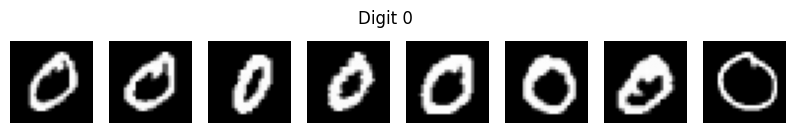

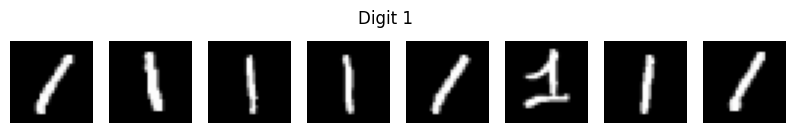

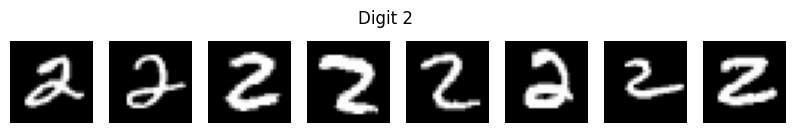

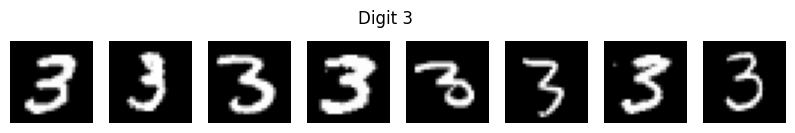

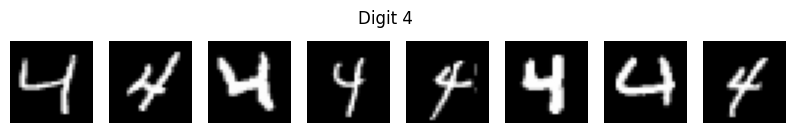

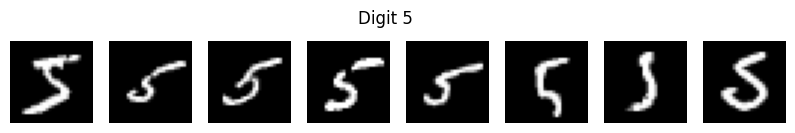

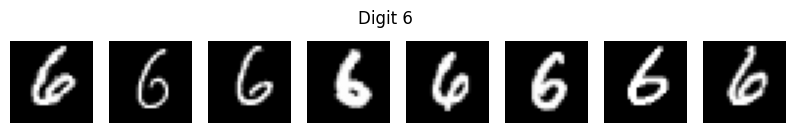

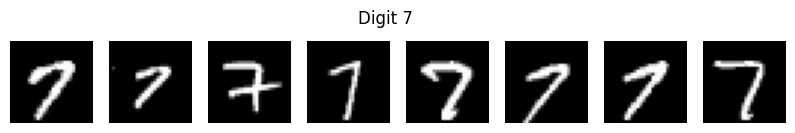

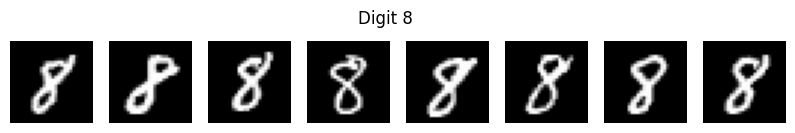

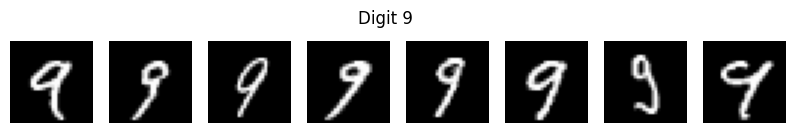

In [9]:
# 2) Show samples
for d in range(10):
    idx = np.where(train_labels==d)[0][:8]
    fig, axes = plt.subplots(1, len(idx), figsize=(10,1.5))
    for ax, i in zip(axes, idx):
        ax.imshow(train_images[i], cmap='gray')
        ax.axis('off')
    fig.suptitle(f"Digit {d}")
    plt.show()

#### Độ đậm mỗi ảnh (tổng pixel)

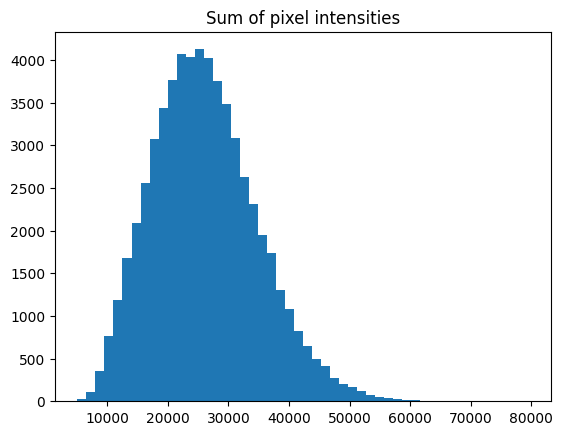

In [10]:
# 3) Per-image intensity stats
flat = train_images.reshape(len(train_images), -1)
sums = flat.sum(axis=1)
plt.hist(sums, bins=50); plt.title("Sum of pixel intensities"); plt.show()

#### Độ ẩm mỗi label

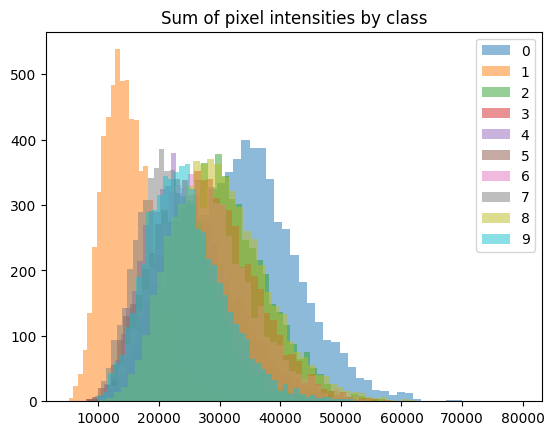

In [11]:
flat = train_images.reshape(len(train_images), -1)
sums = flat.sum(axis=1)

for d in range(10):
    plt.hist(sums[train_labels == d], bins=50, alpha=0.5, label=str(d))

plt.title("Sum of pixel intensities by class")
plt.legend()
plt.show()


#### Mean image per class

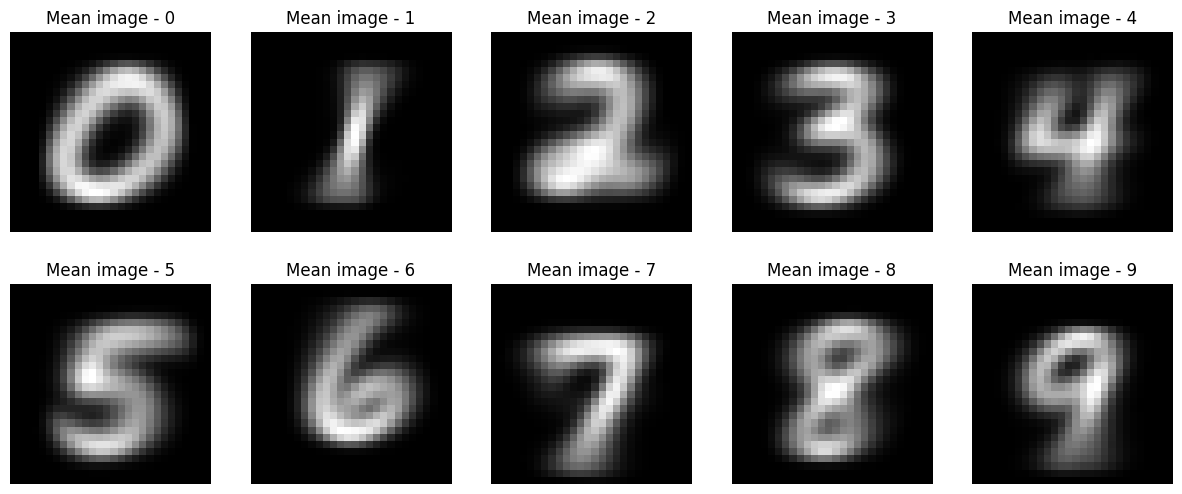

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for d, ax in enumerate(axes.flat):
    mean_img = train_images[train_labels==d].mean(axis=0)
    ax.imshow(mean_img, cmap='gray')
    ax.set_title(f"Mean image - {d}")
    ax.axis('off')
plt.show()

# Model

## 1. Load data

In [13]:
import struct
import numpy as np

class loaded_MNIST:
    def __init__(self, img_data="", label_data=""):
        self.images = self.read_images(img_data)
        self.labels = self.read_labels(label_data)
    def read_images(self, filename):
        with open(filename, 'rb') as f:
            magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
            data = np.frombuffer(f.read(), dtype=np.uint8)
            images = data.reshape(num, rows, cols)
            return images
    def read_labels(self, filename):
        with open(filename, 'rb') as f:
            magic, num = struct.unpack(">II", f.read(8))
            data = np.frombuffer(f.read(), dtype=np.uint8)
            return data

## 2. Trích xuất đặc trưng ảnh sử dụng Dimensionality reduction (PCA) và tiền xử lý dữ liệu:

+ PCA (Principal Component Analysis – Phân tích thành phần chính) là một kỹ thuật giảm chiều dữ liệu và trích xuất đặc trưng bằng cách tìm ra các hướng trong không gian dữ liệu mà phương sai lớn nhất.
+ Với ma trận dữ liệu:
    
    $X \in \mathbb{R}^{N \times d}$


+ Bước 1: Chuẩn hóa dữ liệu:
    $
    \mu = \frac{1}{N}\sum_{i=1}^{N} x_i,
    \qquad
    X_c = X - \mu
    $

+ Bước 2: Tính ma trận hiệp phương sai:
$
C = \frac{1}{N}X_c^{T}X_c
$

+ Bước 3: Phân rã trị riêng và vector riêng:
$
C u_k = \lambda_k u_k
$
    + Trong đó: $u_k$: vector riêng
    + $\lambda_k$: trị riêng

+ Bước 4: Chọn thành phần chính - lấy $m$ vector riêng ứng với $m$ trị riêng lớn nhất:
$
U_m = [u_1, \ldots, u_m]
$

+ Bước 5: Chiếu dữ liệu lên không gian mới
$
Z = X_c U_m \in \mathbb{R}^{N \times m}
$



+ Với tập dữ liệu: MNIST mỗi ảnh 28×28 → 784 chiều.

+ Sử dụng PCA giảm còn 50–100 chiều.

+ Sau đó train Softmax Regression nhanh hơn và đôi khi giúp mô hình ổn định hơn.

Quá trình hoạt động của PCA bao gồm các bước cơ bản sau:

Bước 1: Chuẩn hóa dữ liệu: Dữ liệu được chuẩn hóa về cùng một thang đo bằng cách trừ đi giá trị trung bình.

Bước 2: Tính ma trận hiệp phương sai: Bước này nhằm tính toán ma trận hiệp phương sai để xác định mối quan hệ và mức độ tương quan giữa các biến, nhận diện thông tin dư thừa

Bước 3: Phân rã trị riêng và vector riêng: Từ ma trận hiệp phương sai, PCA tìm ra các eigenvectors (vector riêng) và eigenvalues (trị riêng). Các vector riêng xác định các hướng có độ biến thiên dữ liệu lớn nhất, còn các trị riêng cho biết lượng thông tin mà mỗi hướng mang lại.

Bước 4: Chọn thành phần chính: Các eigenvectors được sắp xếp theo thứ tự giảm dần của eigenvalues. Những vector có trị riêng cao nhất sẽ được chọn làm thành phần chính vì chúng chứa nhiều thông tin nhất.

Bước 5: Chiếu dữ liệu lên không gian mới: Dữ liệu gốc được chiếu lên các thành phần chính đã chọn. Kết quả thu được là một tập dữ liệu có số chiều thấp hơn nhưng vẫn giữ được hầu hết các đặc trưng quan trọng, giúp trực quan hóa dễ dàng hơn và tăng hiệu quả cho các thuật toán học máy.

Ref: https://vnptai.io/vi/blog/detail/principal-component-analysis-la-gi

##### PCA:

In [14]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.U_m = None
        self.mu = None
        self.eigvals_sorted = None

    def fit(self, X):
        """
        X: (N, d) numpy
        """
        X = X.astype(np.float64)

        # 1) mean center and normalize
        self.mu = X.mean(axis=0)
        Xc = X - self.mu

        # 2) covariance
        N = X.shape[0]
        C = (Xc.T @ Xc) / N

        # 3) eigen decomposition
        eigvals, eigvecs = np.linalg.eigh(C)

        # 4) sort descending
        idx = np.argsort(eigvals)[::-1]
        self.eigvals_sorted = eigvals[idx]
        eigvecs_sorted = eigvecs[:, idx]

        # 5) take top m
        self.U_m = eigvecs_sorted[:, :self.n_components]

        return self

    def transform(self, X):
        """
        X: (N, d) numpy
        """
        if self.U_m is None or self.mu is None:
            raise ValueError("PCA must be fitted before calling transform().")

        X = X.astype(np.float64)
        Xc = X - self.mu
        return Xc @ self.U_m

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
print("PCA class defined.")

PCA class defined.


### Thống kê về PCA:

In [15]:
data_train = loaded_MNIST(img_data="../data/train-images.idx3-ubyte",
                             label_data="../data/train-labels.idx1-ubyte")
X_train_img, X_train_labels = data_train.images, data_train.labels

data_test = loaded_MNIST(img_data="../data/t10k-images.idx3-ubyte",
                            label_data="../data/t10k-labels.idx1-ubyte")
X_test_img, X_test_labels = data_test.images, data_test.labels

# Flatten và chuẩn hóa [0,1] cho công bằng hơn
X_train = X_train_img.reshape(len(X_train_img), -1).astype(np.float64) / 255.0
X_test  = X_test_img.reshape(len(X_test_img),  -1).astype(np.float64) / 255.0

In [16]:
def reconstruct_from_pca(x, pca):
    """
    x: (1, 784)
    return x_recon: (1, 784)
    """
    z = pca.transform(x)                  # (1, m)
    x_recon = z @ pca.U_m.T + pca.mu      # (1, 784)
    return x_recon

def show_reconstruction(img, pca_list, titles, img_shape=(28,28)):
    """
    img: (28,28) hoặc (784,)
    pca_list: list các PCA đã fit với m khác nhau
    """
    if img.ndim == 2:
        x = img.reshape(1, -1).astype(np.float64) / 255.0
        original = img.astype(np.float64) / 255.0
    else:
        x = img.reshape(1, -1).astype(np.float64)
        original = img.reshape(img_shape)

    plt.figure(figsize=(3*(len(pca_list)+1), 3))

    # Original
    plt.subplot(1, len(pca_list)+1, 1)
    plt.title("Original")
    plt.imshow(original, cmap="gray")
    plt.axis("off")

    # Reconstructions
    for i, pca in enumerate(pca_list):
        x_rec = reconstruct_from_pca(x, pca).reshape(img_shape)

        plt.subplot(1, len(pca_list)+1, i+2)
        plt.title(titles[i])
        plt.imshow(x_rec, cmap="gray")
        plt.axis("off")
    

    plt.show()


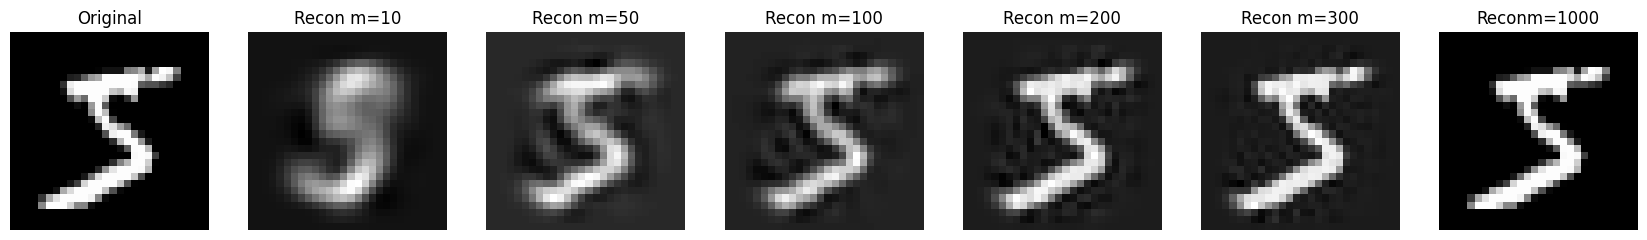

In [17]:
from PIL import Image
#  Ví dụ bạn fit 3 PCA với m khác nhau
pca_10  = PCA(10).fit(X_train)
    
pca_50  = PCA(50).fit(X_train)
pca_100 = PCA(100).fit(X_train)
pca_200 = PCA(200).fit(X_train)
pca_300 = PCA(300).fit(X_train)
pca_1000 = PCA(1000).fit(X_train)

# Lấy 1 ảnh test dạng (28,28)
img = X_train[0]

show_reconstruction(
    img,
    [pca_10, pca_50, pca_100, pca_200, pca_300, pca_1000],
    ["Recon m=10", "Recon m=50", "Recon m=100", "Recon m=200", "Recon m=300", "Reconm=1000"]
)

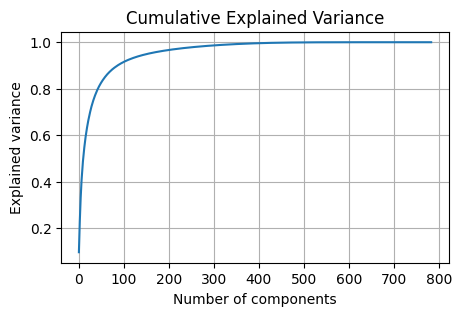

In [18]:
def plot_explained_variance(pca):
    eigvals = pca.eigvals_sorted
    ratio = eigvals / np.sum(eigvals)
    cum_ratio = np.cumsum(ratio)

    plt.figure(figsize=(5,3))
    plt.plot(cum_ratio)
    plt.title("Cumulative Explained Variance")
    plt.xlabel("Number of components")
    plt.ylabel("Explained variance")
    plt.grid(True)
    plt.show()
pca = PCA(n_components=100).fit(X_train)
plot_explained_variance(pca)

### Model Softmax Regression:

In [19]:
class SoftmaxRegression:
    def __init__(self, lr=0.1, epochs=1000, n_classes=10):
        self.lr = lr
        self.epochs = epochs
        self.n_classes = n_classes
        self.W = None
        self.b = None
        self.losses = []

    def one_hot_encode(self, y):
        one_hot = np.zeros((len(y), self.n_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot

    def softmax(self, z):
        z = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros((n_features, self.n_classes), dtype=np.float32)
        self.b = np.zeros((self.n_classes,), dtype=np.float32)
        y_encoded = self.one_hot_encode(y)

        for i in range(self.epochs):
            z = X @ self.W + self.b
            y_pred = self.softmax(z)

            loss = -np.mean(np.sum(y_encoded * np.log(y_pred + 1e-8), axis=1))
            self.losses.append(loss)

            dW = (1 / n_samples) * (X.T @ (y_pred - y_encoded))
            db = (1 / n_samples) * np.sum(y_pred - y_encoded, axis=0)

            self.W -= self.lr * dW
            self.b -= self.lr * db

            if (i + 1) % 100 == 0:
                print(f"Epoch {i+1}, Loss: {loss:.4f}")

    def predict(self, X):
        z = X @ self.W + self.b
        y_pred = self.softmax(z)
        return np.argmax(y_pred, axis=1)


# Evaluation:

In [20]:
def evaluate_model_multiclass(model, X, y):
    y_pred = model.predict(X)
    accuracy = np.mean(y_pred == y)

    K = model.n_classes
    cm = np.zeros((K, K), dtype=int)
    for t, p in zip(y, y_pred):
        cm[t, p] += 1

    precisions, recalls, f1s = [], [], []
    for k in range(K):
        tp = cm[k, k]
        fp = cm[:, k].sum() - tp
        fn = cm[k, :].sum() - tp

        precision = tp / (tp + fp + 1e-8)
        recall    = tp / (tp + fn + 1e-8)
        f1        = 2 * precision * recall / (precision + recall + 1e-8)

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    precision_macro = float(np.mean(precisions))
    recall_macro = float(np.mean(recalls))
    f1_macro = float(np.mean(f1s))

    return accuracy, precision_macro, recall_macro, f1_macro, cm


# Main:

Epoch 100, Loss: 0.6117
Epoch 200, Loss: 0.4931
Epoch 300, Loss: 0.4450
Epoch 400, Loss: 0.4176
Epoch 500, Loss: 0.3994
Epoch 600, Loss: 0.3862
Epoch 700, Loss: 0.3761
Epoch 800, Loss: 0.3680
Epoch 900, Loss: 0.3613
Epoch 1000, Loss: 0.3557
Training completed.


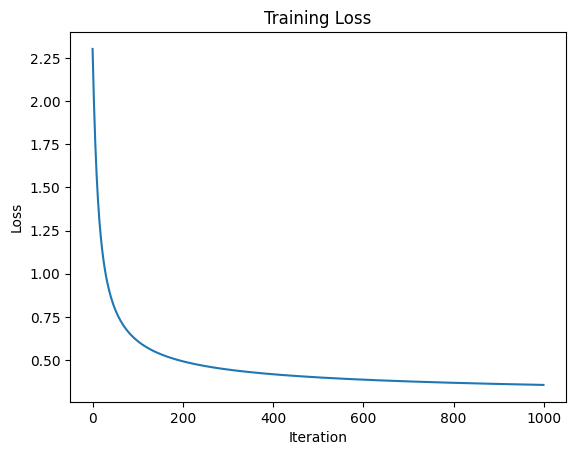

In [21]:
# Data preparation
data_train = loaded_MNIST(img_data="../data/train-images.idx3-ubyte",
                             label_data="../data/train-labels.idx1-ubyte")
X_train_img, X_train_labels = data_train.images, data_train.labels

data_test = loaded_MNIST(img_data="../data/t10k-images.idx3-ubyte",
                            label_data="../data/t10k-labels.idx1-ubyte")
X_test_img, X_test_labels = data_test.images, data_test.labels

# Preprocess data with PCA
X_train = X_train_img.reshape(len(X_train_img), -1).astype(np.float64) / 255.0
X_test  = X_test_img.reshape(len(X_test_img),  -1).astype(np.float64) / 255.0
pca = PCA(n_components=100).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

# Model training
model = SoftmaxRegression(lr=0.1, epochs=1000, n_classes=10)
model.fit(X_train_pca, X_train_labels)

print("Training completed.")
plt.plot(model.losses)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


In [22]:
accuracy, precision, recall, f1_score, confusion_matrix = evaluate_model_multiclass(model, X_test_pca, X_test_labels)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.9056
Precision: 0.9045
Recall: 0.9043
F1 Score: 0.9042


Confusion Matrix:


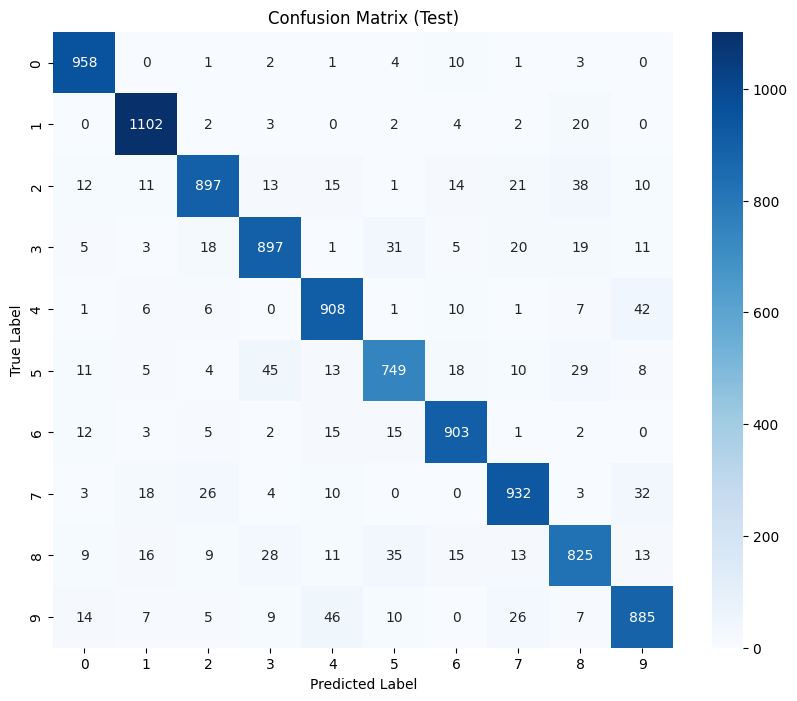

In [23]:
print("Confusion Matrix:")
# Confusion Matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### Save model

In [24]:
with open("./model/softmax_regression_model_PCA100.npz", "wb") as f:
    np.savez(f, weights=model.W, b=model.b, mu=pca.mu, U_m=pca.U_m)

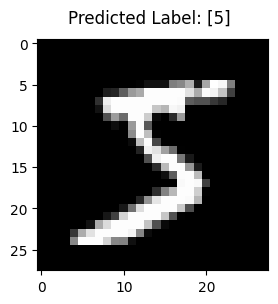

In [25]:
model_test = SoftmaxRegression(lr=0.1, epochs=1000, n_classes=10)
PCA_test = PCA(n_components=100)
with np.load("./model/softmax_regression_model_PCA100.npz") as data:
    model_test.W = data["weights"]
    model_test.b = data["b"]
    PCA_test.mu = data["mu"]
    PCA_test.U_m = data["U_m"]
    
# Evaluate loaded model
img = X_train_img[0]
x = img.reshape(1, -1).astype(np.float64) / 255.0
x_pca = PCA_test.transform(x)
y_pre = model_test.predict(x_pca)
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.imshow(X_train_img[0], cmap='gray')
fig.suptitle(f"Predicted Label: {y_pre}")
plt.show()